In [103]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df.fillna('',inplace=True)
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [21]:
# 기초 데이터 탐색
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [76]:
df['order_id'] = df['order_id'].astype(str)

In [83]:
# 주문당 평균 계산금액을 출력
# df['item_price'] = df['item_price'].str.replace('$','').astype(float)
df.groupby('order_id')['item_price'].sum().mean()
# 한 주문에 10달러 이상 사용한 주문 번호를 출력하시오
df_sum = df.groupby('order_id').sum()
df_sum[df_sum['item_price']>=10].sort_values('item_price',ascending=False).head()['item_price']

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
Name: item_price, dtype: float64

In [90]:
# item_name당 주문갯수 출력
df.groupby('item_name')['order_id'].count()


item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


<BarContainer object of 50 artists>

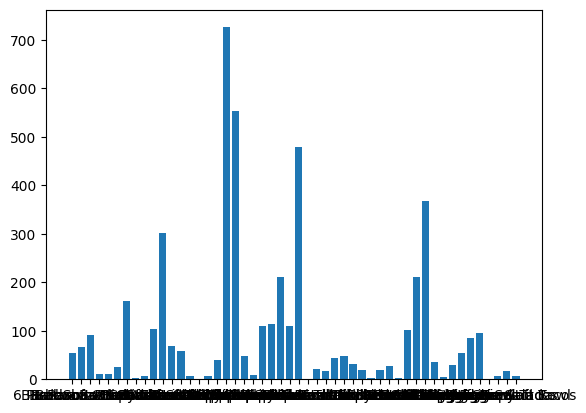

In [98]:
# 막대 그래프를 그려보세요
import matplotlib.pyplot as plt
x = df.groupby('item_name')['order_id'].count().index
y = df.groupby('item_name')['order_id'].count().values
plt.bar(x,y)

In [117]:
### 각 아이템의 가격 구하시오.
## 주문이 1개이면서 item_name 최저가격인 것을 출력하시오
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df.fillna('',inplace=True)
df['item_price'] = df['item_price'].str.replace('$','').astype(float)
filt = df['quantity'] == 1
df[filt]['item_price'].min()

1.09

In [143]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df.fillna('',inplace=True)
df['item_price'] = df['item_price'].str.replace('$','').astype(float)
## 가장 비싼 주문에서 item 이 총 몇개 주문 되었는지 출력하시오.
## 주문중 가장 높은 금액의 수량과 금액을 출력하시오.
###가장 높은 금액으로 주문한 주문번호,수량,금액를 출력하시오.
df.groupby('order_id')[['order_id','quantity','item_price']].sum().sort_values('item_price',ascending=False).max()

order_id      21298.00
quantity         35.00
item_price      205.25
dtype: float64

In [166]:
## Chicken Bowl	 를 한 주문에 2개 이상 주문한 횟수가 몇번인지 출력하시오.
filt = df[df['item_name'] == 'Chicken Bowl']
len(filt[filt['quantity'] >= 2])

# chicken bow 총 매출액
chicken = filt['item_price'].sum()

# Chicken Bowl은 총 매출액의 몇%가 되는지 출력하시오
all_sum = df['item_price'].sum()
chicken/all_sum*100

21.283176657731442